In [20]:
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

# !curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-S

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:


df=pd.read_csv("FuelConsumption.csv")

In [23]:


df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
cdf=df[["ENGINESIZE","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

cdf.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


In [25]:

from sklearn.model_selection import train_test_split

In [26]:

train, test=train_test_split(df,test_size=0.2)

In [27]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [28]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=3)
     

In [29]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[  1.      2.      4.      8.   ]
 [  1.      5.3    28.09  148.877]
 [  1.      2.      4.      8.   ]
 ...
 [  1.      3.6    12.96   46.656]
 [  1.      3.5    12.25   42.875]
 [  1.      2.4     5.76   13.824]]


In [30]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [31]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         26.29664578  5.16595924 -0.5703608 ]]
Intercept: [134.19530057]


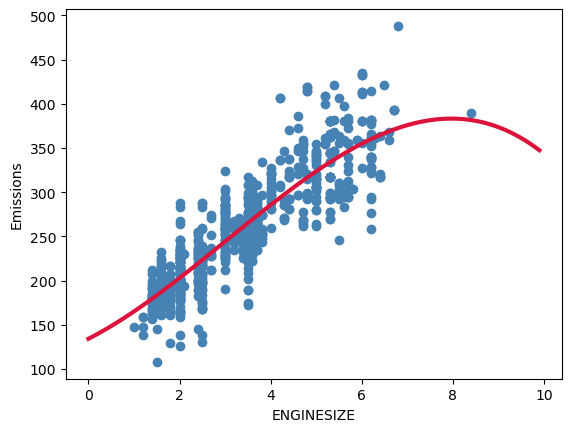

In [32]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) + clf.coef_[0][3] * np.power(XX,3)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [33]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[134.19530057 136.87605438 139.65670521 142.53383089 145.50400927
 148.56381817 151.70983543 154.93863889 158.24680638 161.63091573
 165.08754479 168.61327139 172.20467336 175.85832853 179.57081475
 183.33870985 187.15859166 191.02703802 194.94062676 198.89593572
 202.88954274 206.91802564 210.97796227 215.06593046 219.17850805
 223.31227286 227.46380274 231.62967552 235.80646904 239.99076113
 244.17912962 248.36815236 252.55440717 256.7344719  260.90492437
 265.06234243 269.2033039  273.32438663 277.42216845 281.49322719
 285.53414068 289.54148678 293.5118433  297.44178808 301.32789897